In [1]:
#import sqlite3
#from sklearn.cluster import KMeans
#from sklearn.preprocessing import scale
%matplotlib inline  
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sys
import seaborn as sns

In [2]:
India_dataset_path = 'Dataset/API_IND_DS2_en_csv_v2_10135894/'
USA_dataset_path = 'Dataset/API_NY.GDP.MKTP.CD_DS2_en_csv_v2_10134290/'

In [3]:
india_df = pd.read_csv(India_dataset_path+'API_IND_DS2_en_csv_v2_10135894.csv',skiprows=3)

In [4]:
india_df

,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2009,2010,2011,2012,2013,2014,2015,2016,2017,Unnamed: 62
0,India,IND,"Presence of peace keepers (number of troops, p...",VC.PKP.TOTL.UN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,India,IND,"Intentional homicides (per 100,000 people)",VC.IHR.PSRC.P5,NaN,NaN,NaN,NaN,NaN,NaN,...,3.773790e+00,3.774227e+00,3.819646e+00,3.758949e+00,3.588249e+00,3.660058e+00,3.390616e+00,3.223699e+00,NaN,NaN
2,India,IND,"Intentional homicides, male (per 100,000 male)",VC.IHR.PSRC.MA.P5,NaN,NaN,NaN,NaN,NaN,NaN,...,4.441221e+00,4.477722e+00,4.468985e+00,4.431416e+00,4.218435e+00,4.333956e+00,4.020842e+00,3.735951e+00,NaN,NaN
3,India,IND,"Intentional homicides, female (per 100,000 fem...",VC.IHR.PSRC.FE.P5,NaN,NaN,NaN,NaN,NaN,NaN,...,3.054638e+00,3.016158e+00,3.119986e+00,3.034514e+00,2.909561e+00,2.934533e+00,2.712336e+00,2.672389e+00,NaN,NaN
4,India,IND,"Internally displaced persons, total displaced ...",VC.IDP.TOCV,NaN,NaN,NaN,NaN,NaN,NaN,...,5.000000e+05,6.500000e+05,6.500000e+05,1.000000e+06,5.260000e+05,8.540000e+05,6.120000e+05,7.960000e+05,8.060000e+05,NaN
5,India,IND,"Internally displaced persons, new displacement...",VC.IDP.NWDS,NaN,NaN,NaN,NaN,NaN,NaN,...,5.304000e+06,1.411000e+06,1.503000e+06,9.110000e+06,2.145000e+06,3.428000e+06,3.655000e+06,2.400000e+06,1.346000e+06,NaN
6,India,IND,"Internally displaced persons, new displacement...",VC.IDP.NWCV,NaN,NaN,NaN,NaN,NaN,NaN,...,3.300000e+04,1.070000e+05,5.300000e+04,5.000000e+05,6.400000e+04,3.450000e+05,1.000000e+03,4.480000e+05,7.800000e+04,NaN
7,India,IND,Battle-related deaths (number of people),VC.BTL.DETH,NaN,NaN,NaN,NaN,NaN,NaN,...,1.115000e+03,1.029000e+03,4.330000e+02,4.090000e+02,3.840000e+02,4.630000e+02,4.950000e+02,6.550000e+02,6.560000e+02,NaN
8,India,IND,Travel services (% of commercial service exports),TX.VAL.TRVL.ZS.WT,NaN,NaN,NaN,NaN,NaN,NaN,...,1.204084e+01,1.242864e+01,1.283755e+01,1.239164e+01,1.237169e+01,1.257876e+01,1.349412e+01,1.390979e+01,1.492431e+01,NaN
9,India,IND,Transport services (% of commercial service ex...,TX.VAL.TRAN.ZS.WT,NaN,NaN,NaN,NaN,NaN,NaN,...,1.214528e+01,1.138684e+01,1.283318e+01,1.207117e+01,1.137553e+01,1.187446e+01,9.195540e+00,9.412085e+00,9.260048e+00,NaN


In [5]:
india_df.columns

Index([u'Country Name', u'Country Code', u'Indicator Name', u'Indicator Code',
       u'1960', u'1961', u'1962', u'1963', u'1964', u'1965', u'1966', u'1967',
       u'1968', u'1969', u'1970', u'1971', u'1972', u'1973', u'1974', u'1975',
       u'1976', u'1977', u'1978', u'1979', u'1980', u'1981', u'1982', u'1983',
       u'1984', u'1985', u'1986', u'1987', u'1988', u'1989', u'1990', u'1991',
       u'1992', u'1993', u'1994', u'1995', u'1996', u'1997', u'1998', u'1999',
       u'2000', u'2001', u'2002', u'2003', u'2004', u'2005', u'2006', u'2007',
       u'2008', u'2009', u'2010', u'2011', u'2012', u'2013', u'2014', u'2015',
       u'2016', u'2017', u'Unnamed: 62'],
      dtype='object')

In [6]:
india_df_filtered = india_df.drop(india_df.columns[[4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 61, 62]], axis=1)

In [7]:
india_df_filtered.columns

Index([u'Country Name', u'Country Code', u'Indicator Name', u'Indicator Code',
       u'1971', u'1972', u'1973', u'1974', u'1975', u'1976', u'1977', u'1978',
       u'1979', u'1980', u'1981', u'1982', u'1983', u'1984', u'1985', u'1986',
       u'1987', u'1988', u'1989', u'1990', u'1991', u'1992', u'1993', u'1994',
       u'1995', u'1996', u'1997', u'1998', u'1999', u'2000', u'2001', u'2002',
       u'2003', u'2004', u'2005', u'2006', u'2007', u'2008', u'2009', u'2010',
       u'2011', u'2012', u'2013', u'2014', u'2015', u'2016'],
      dtype='object')

In [8]:
india_df_filtered.isnull().any().any(), india_df.shape

(True, (1591, 63))

In [9]:
india_df_filtered.isnull().sum(axis=1)

0       46
1       24
2       29
3       29
4       38
5       37
6       38
7       18
8        4
9        4
10      17
11      17
12       4
13       4
14       9
15       0
16       0
17       0
18       0
19       0
20       0
21       0
22       0
23       0
24       0
25       0
26       0
27       0
28       0
29       0
        ..
1561     4
1562     0
1563     0
1564     0
1565     0
1566     0
1567     0
1568    16
1569    43
1570    43
1571     0
1572    36
1573    33
1574    20
1575    20
1576    43
1577    43
1578    43
1579    43
1580    43
1581     1
1582     0
1583     1
1584     1
1585     1
1586     1
1587     1
1588    32
1589    31
1590    16
Length: 1591, dtype: int64

In [10]:
india_df_filtered

,Country Name,Country Code,Indicator Name,Indicator Code,1971,1972,1973,1974,1975,1976,...,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016
0,India,IND,"Presence of peace keepers (number of troops, p...",VC.PKP.TOTL.UN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,India,IND,"Intentional homicides (per 100,000 people)",VC.IHR.PSRC.P5,NaN,NaN,NaN,NaN,NaN,NaN,...,3.845276e+00,3.842386e+00,3.773790e+00,3.774227e+00,3.819646e+00,3.758949e+00,3.588249e+00,3.660058e+00,3.390616e+00,3.223699e+00
2,India,IND,"Intentional homicides, male (per 100,000 male)",VC.IHR.PSRC.MA.P5,NaN,NaN,NaN,NaN,NaN,NaN,...,4.670325e+00,4.672067e+00,4.441221e+00,4.477722e+00,4.468985e+00,4.431416e+00,4.218435e+00,4.333956e+00,4.020842e+00,3.735951e+00
3,India,IND,"Intentional homicides, female (per 100,000 fem...",VC.IHR.PSRC.FE.P5,NaN,NaN,NaN,NaN,NaN,NaN,...,2.956746e+00,2.948596e+00,3.054638e+00,3.016158e+00,3.119986e+00,3.034514e+00,2.909561e+00,2.934533e+00,2.712336e+00,2.672389e+00
4,India,IND,"Internally displaced persons, total displaced ...",VC.IDP.TOCV,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,5.000000e+05,6.500000e+05,6.500000e+05,1.000000e+06,5.260000e+05,8.540000e+05,6.120000e+05,7.960000e+05
5,India,IND,"Internally displaced persons, new displacement...",VC.IDP.NWDS,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,6.662000e+06,5.304000e+06,1.411000e+06,1.503000e+06,9.110000e+06,2.145000e+06,3.428000e+06,3.655000e+06,2.400000e+06
6,India,IND,"Internally displaced persons, new displacement...",VC.IDP.NWCV,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,3.300000e+04,1.070000e+05,5.300000e+04,5.000000e+05,6.400000e+04,3.450000e+05,1.000000e+03,4.480000e+05
7,India,IND,Battle-related deaths (number of people),VC.BTL.DETH,NaN,NaN,NaN,NaN,NaN,NaN,...,1.084000e+03,1.076000e+03,1.115000e+03,1.029000e+03,4.330000e+02,4.090000e+02,3.840000e+02,4.630000e+02,4.950000e+02,6.550000e+02
8,India,IND,Travel services (% of commercial service exports),TX.VAL.TRVL.ZS.WT,NaN,NaN,NaN,NaN,2.738566e+01,2.994523e+01,...,1.244211e+01,1.119735e+01,1.204084e+01,1.242864e+01,1.283755e+01,1.239164e+01,1.237169e+01,1.257876e+01,1.349412e+01,1.390979e+01
9,India,IND,Transport services (% of commercial service ex...,TX.VAL.TRAN.ZS.WT,NaN,NaN,NaN,NaN,4.149790e+01,3.535906e+01,...,1.184061e+01,1.211740e+01,1.214528e+01,1.138684e+01,1.283318e+01,1.207117e+01,1.137553e+01,1.187446e+01,9.195540e+00,9.412085e+00


In [11]:
rows = india_df_filtered.shape[0]
india_df_filtered=india_df_filtered.dropna()

In [12]:
india_df_filtered

,Country Name,Country Code,Indicator Name,Indicator Code,1971,1972,1973,1974,1975,1976,...,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016
15,India,IND,Merchandise exports to low- and middle-income ...,TX.VAL.MRCH.WR.ZS,4.097793e+00,6.511002e+00,8.070400e+00,4.066723e+00,4.439475e+00,3.614062e+00,...,5.758313e+00,5.084433e+00,4.519068e+00,5.001391e+00,4.486542e+00,4.996445e+00,5.238507e+00,6.447890e+00,6.646335e+00,6.479652e+00
16,India,IND,Merchandise exports by the reporting economy (...,TX.VAL.MRCH.WL.CD,2.108940e+09,2.437720e+09,2.957970e+09,3.891340e+09,4.364030e+09,5.017900e+09,...,1.533487e+11,1.950550e+11,1.651884e+11,2.229069e+11,3.070441e+11,2.971975e+11,3.150898e+11,3.177193e+11,2.661628e+11,2.618617e+11
17,India,IND,"Merchandise exports by the reporting economy, ...",TX.VAL.MRCH.RS.ZS,2.056199e+01,2.119973e+01,1.864691e+01,1.840009e+01,1.627624e+01,1.467307e+01,...,2.512881e-01,1.815115e+00,2.766700e+00,1.363662e+00,4.917768e+00,1.623469e+00,3.656230e+00,9.700200e-01,8.537993e-01,9.000298e-01
18,India,IND,Merchandise exports to low- and middle-income ...,TX.VAL.MRCH.R6.ZS,6.155225e+00,4.385245e+00,2.897933e+00,3.909964e+00,4.634478e+00,3.713904e+00,...,6.738642e+00,6.370745e+00,5.968407e+00,6.356339e+00,6.378284e+00,7.679069e+00,8.205887e+00,9.076899e+00,8.110698e+00,7.137621e+00
19,India,IND,Merchandise exports to low- and middle-income ...,TX.VAL.MRCH.R5.ZS,4.097793e+00,6.511002e+00,8.070400e+00,4.066723e+00,4.439475e+00,3.614062e+00,...,5.758313e+00,5.084433e+00,4.519068e+00,5.001391e+00,4.486542e+00,4.996445e+00,5.238507e+00,6.447890e+00,6.646335e+00,6.479652e+00
20,India,IND,Merchandise exports to low- and middle-income ...,TX.VAL.MRCH.R4.ZS,4.763530e+00,4.480006e+00,3.401995e+00,8.419208e+00,1.353978e+01,7.448933e+00,...,4.311286e+00,4.170891e+00,4.077731e+00,3.772998e+00,3.236455e+00,3.983904e+00,4.485826e+00,4.403226e+00,3.678746e+00,3.290256e+00
21,India,IND,Merchandise exports to low- and middle-income ...,TX.VAL.MRCH.R3.ZS,7.695809e-01,3.917595e-01,3.029104e-01,6.763737e-01,3.957351e-01,3.724666e-01,...,3.130533e+00,3.073524e+00,2.344097e+00,2.977311e+00,3.235858e+00,3.836744e+00,3.549612e+00,4.474383e+00,3.740659e+00,3.582935e+00
22,India,IND,Merchandise exports to low- and middle-income ...,TX.VAL.MRCH.R2.ZS,1.763919e+00,2.103195e+00,1.854988e+00,1.310603e+00,1.670016e+00,2.179796e+00,...,2.416292e+00,2.226072e+00,2.071091e+00,2.431420e+00,2.369047e+00,2.595865e+00,2.640054e+00,3.182255e+00,2.838061e+00,3.000407e+00
23,India,IND,Merchandise exports to low- and middle-income ...,TX.VAL.MRCH.R1.ZS,2.548200e+00,1.752047e+00,2.030785e+00,3.053704e+00,3.185358e+00,3.603699e+00,...,1.261175e+01,1.180107e+01,1.280178e+01,1.456718e+01,1.249525e+01,1.146129e+01,1.159017e+01,1.102414e+01,1.076934e+01,1.075110e+01
24,India,IND,Merchandise exports to low- and middle-income ...,TX.VAL.MRCH.OR.ZS,1.600046e+01,1.311225e+01,1.048861e+01,1.736985e+01,2.342537e+01,1.731880e+01,...,2.920850e+01,2.764230e+01,2.726311e+01,3.010525e+01,2.771489e+01,2.955687e+01,3.047155e+01,3.216090e+01,2.913750e+01,2.776232e+01


In [13]:
india_df_filtered.values[99]

array(['India', 'IND', 'PPG, bilateral (INT, current US$)',
       'DT.INT.BLAT.CD', 154948000.0, 173623000.0, 180764000.0,
       182032000.0, 186046000.0, 192191000.0, 208423000.0, 245516000.0,
       254899000.0, 251262000.0, 242306000.0, 214966000.0, 219268000.0,
       212561000.0, 294604000.0, 296086000.0, 324583000.0, 363870000.0,
       712114000.0, 751511000.0, 717921000.0, 730810000.0, 729802000.0,
       818802000.0, 811037000.0, 726700000.0, 699272000.0, 660250000.0,
       664772000.0, 602382000.0, 536130000.0, 512132000.0, 732685000.0,
       550845000.0, 606243000.0, 431398000.0, 393774000.0, 418770000.0,
       453331000.0, 436306000.0, 482505000.0, 468209000.0, 397998000.0,
       376577000.0, 352498000.0, 359451000.0], dtype=object)

In [14]:
india_df_filtered.isnull().sum()

Country Name      0
Country Code      0
Indicator Name    0
Indicator Code    0
1971              0
1972              0
1973              0
1974              0
1975              0
1976              0
1977              0
1978              0
1979              0
1980              0
1981              0
1982              0
1983              0
1984              0
1985              0
1986              0
1987              0
1988              0
1989              0
1990              0
1991              0
1992              0
1993              0
1994              0
1995              0
1996              0
1997              0
1998              0
1999              0
2000              0
2001              0
2002              0
2003              0
2004              0
2005              0
2006              0
2007              0
2008              0
2009              0
2010              0
2011              0
2012              0
2013              0
2014              0
2015              0
2016              0


In [15]:
#india_df_filtered.loc[india_df_filtered['Indicator Code'] == 'NY.GDS.TOTL.ZS'].corr(india_df_filtered.loc[india_df_filtered['Indicator Code'] == 'NY.ADJ.NNTY.KD.ZG'])

In [16]:
india_df_filtered = india_df_filtered.drop(['Country Name', 'Country Code', 'Indicator Code'], axis=1)

In [17]:
india_df_filtered_T = india_df_filtered.T

In [18]:
india_df_filtered_T = india_df_filtered_T.iloc[:,0:20]
india_df_final = india_df_filtered_T.convert_objects(convert_numeric=True)

/Users/siddhant/miniconda/envs/deepData/lib/python2.7/site-packages/ipykernel_launcher.py:2: FutureWarning: convert_objects is deprecated.  To re-infer data dtypes for object columns, use DataFrame.infer_objects()
For all other conversions use the data-type specific converters pd.to_datetime, pd.to_timedelta and pd.to_numeric.
  


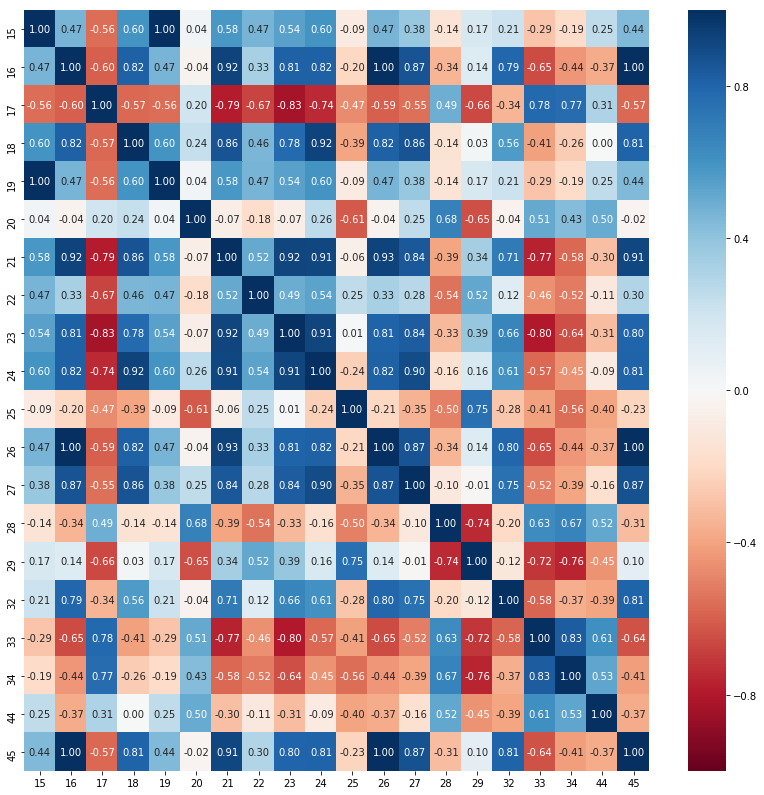

In [19]:
colormap = plt.cm.RdBu
fig, ax = plt.subplots(figsize=(14,14))
sns.heatmap(india_df_final.corr(), annot=True, vmin=-1, vmax=1,fmt = ".2f", cmap = colormap, ax=ax)
plt.show()